Note: 
- Weight of evidence

In [1]:
import pandas as pd
from homehelper.data.dataset import PriceForecastDataset
from homehelper.config import RAW_DIR 

import seaborn as sns
import matplotlib.pyplot as plt 

pd.set_option('display.max_columns',105)
pd.set_option('display.max_rows',105)

In [2]:
data = PriceForecastDataset(('../data/raw/2020-06-26_copenhagen.csv'))

In [3]:
x, y = data.load_training_data()

In [4]:
y

0          $365.00
1        $2,398.00
2        $3,096.00
3          $797.00
4          $857.00
           ...    
28518      $698.00
28519      $698.00
28520    $2,398.00
28521    $1,202.00
28522      $598.00
Name: price, Length: 28523, dtype: string

### Inspect amenities column
- How many unique values? 71

In [ ]:
new_df = x['amenities'].apply(lambda x: x.replace('{', '').replace('}', '').replace('"', '').split(',')).apply(frozenset).to_frame(name='amenities')
new_df

In [ ]:
for amenities in frozenset.union(*new_df.amenities):
    new_df[amenities] = new_df.apply(lambda _: int(amenities in _.amenities), axis=1)

In [ ]:
new_df

In [ ]:
x

### Map the values in a feature

In [ ]:
df.replace(map_example)

In [5]:
map_example = {"colname": 
               {"value1": "target1", 
                "value2": "target1", 
                "value3": "target2", 
                "value4": "target2"
               }
}

In [8]:
x["neighbourhood"].value_counts()
#list(x.neighbourhood.unique())

Nørrebro          5176
Vesterbro         4279
Indre By          3484
Frederiksberg     3343
Østerbro          3018
Amager            2413
København NV      1449
Valby             1237
Amager Vest       1068
Amager Øst         774
Vanløse            770
Brønshøj           548
Islands Brygge     286
Christianshavn     251
Amagerbro          210
Teglholmen         100
Sluseholmen         45
Kødbyen             37
Nyboder             29
Holmen               5
Kastrup              1
Name: neighbourhood, dtype: int64

In [9]:
def list_to_map(current_values, mapped_value):
    map_dict = {}
    for value in current_values:
        map_dict[value] = mapped_value
    return map_dict

In [10]:
def feature_mapping(colname, mapping):
    map_dict = {}
    for target_value, value_list in mapping.items():
        map_dict.update(list_to_map(value_list, target_value))
    return {colname:map_dict}

In [11]:
brokvarter = ["Nørrebro", "Vesterbro", "Østerbro"]
amager = ["Amager", "Amagerbro", "Amager Øst", "Amager Vest", "Islands Brygge", "Kastrup"]
andre = ["Nyboder", "Holmen", "Sluseholmen", "Vanløse", "Teglholmen"]

In [12]:
map_list_dict = {"Brokvarter": brokvarter, "Amager": amager, "Andre": andre}

In [13]:
final_feature_map = feature_mapping("neighbourhood", map_list_dict)

In [14]:
x.replace(final_feature_map, inplace=True)
x.neighbourhood.value_counts()

Brokvarter        12473
Amager             4752
Indre By           3484
Frederiksberg      3343
København NV       1449
Valby              1237
Andre               949
Brønshøj            548
Christianshavn      251
Kødbyen              37
Name: neighbourhood, dtype: int64

### Explore neighbourhood correlation with price

In [17]:
result = pd.concat([x, y], axis=1)

In [18]:
result["price"] = result.price.apply(lambda x: int(x[1:-3].replace(",", "")))

In [21]:
for i in result.neighbourhood.unique():
    print("%-30s %4.1f" % (i, result.loc[result['neighbourhood'] == i].price.median()))

Brokvarter                     698.0
Indre By                       1003.0
Frederiksberg                  751.0
Christianshavn                 897.0
København NV                   498.0
Amager                         698.0
Valby                          597.0
Andre                          598.0
Kødbyen                        837.0
Brønshøj                       598.0


In [22]:
for i in result.neighbourhood.unique():
    print("%-30s %4.1f" % (i, result.loc[result['neighbourhood'] == i].price.mean()))

Brokvarter                     791.6
Indre By                       1305.1
Frederiksberg                  846.0
Christianshavn                 975.8
København NV                   566.7
Amager                         832.0
Valby                          697.7
Andre                          705.5
Kødbyen                        917.9
Brønshøj                       706.1


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

In [19]:
location = result[["host_neighbourhood", "neighbourhood", "city", "zipcode", "price"]]

In [46]:
location.count()

host_neighbourhood    20516
neighbourhood         28523
city                  28510
zipcode               27713
price                 28523
dtype: int64

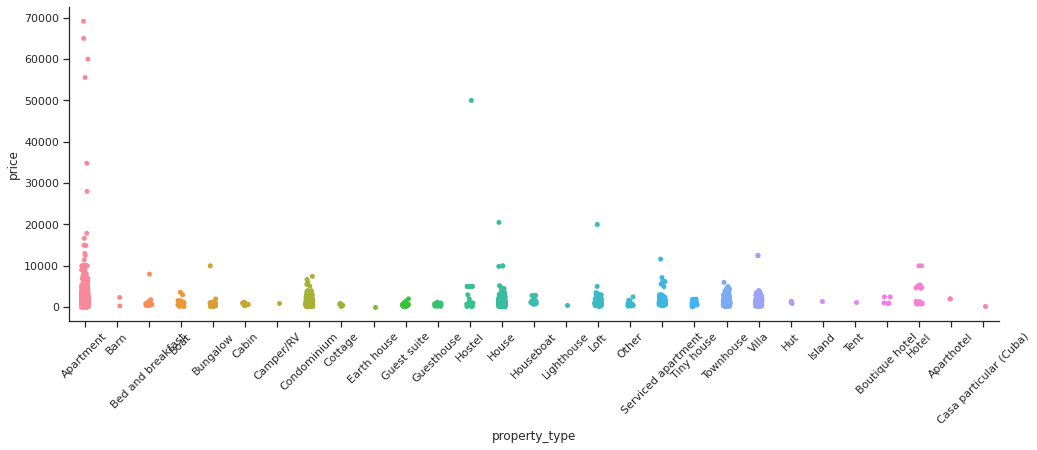

In [53]:
plot = sns.catplot(x="property_type", y="price", data=result)
plot.fig.set_figwidth(20)
plot.set_xticklabels(rotation=45)

<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

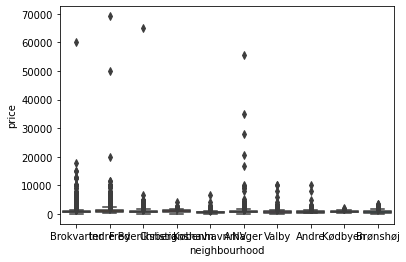

In [24]:
sns.boxplot(x="neighbourhood", y="price", data=location)

<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

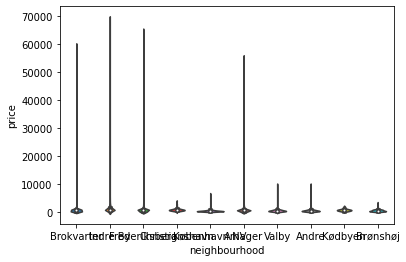

In [25]:
sns.violinplot(x="neighbourhood", y="price", data=location)

<AxesSubplot:xlabel='price'>

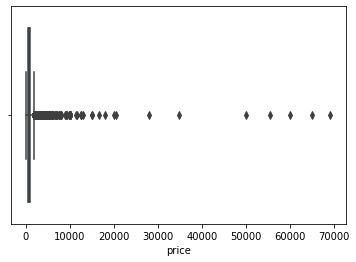

In [28]:
sns.boxplot(x="price", data=location)

# Zipcodes

In [164]:
location

host_neighbourhood  neighbourhood           city zipcode  price
0               Nørrebro     Brokvarter     Copenhagen    2200    365
1               Indre By       Indre By     Copenhagen    2100   2398
2               Indre By       Indre By     Copenhagen    1210   3096
3              Vesterbro     Brokvarter     Copenhagen    1650    797
4               Østerbro     Brokvarter     Copenhagen    2100    857
...                  ...            ...            ...     ...    ...
28518                NaN     Brokvarter      København    2200    698
28519                NaN       Indre By      København    1366    698
28520                NaN         Amager      København    2300   2398
28521                NaN  Frederiksberg  Frederiksberg    2000   1202
28522       København NV     Brokvarter      København    2200    598

[28523 rows x 5 columns]

In [165]:
zipcodes = location["zipcode"].unique()

In [166]:
cleansed_zipcodes = []

for i in zipcodes:
    try:
        if i.isnumeric() == True and len(i) == 4:
            #print(i)
            cleansed_zipcodes.append(i)
    except AttributeError:
        pass

In [167]:
østerbro = ['2100']
nørrebro = ['2200']
amagerbro = ['2300']
vesterbro = [zipcode for zipcode in cleansed_zipcodes if int(zipcode) >= 900 and int(zipcode) <= 1999]
frederiksberg = [zipcode for zipcode in cleansed_zipcodes if int(zipcode) >= 2000 and int(zipcode) < 2100]
valby = ['2500']
sydhavn = ['2450']
andre = [zipcode for zipcode in cleansed_zipcodes if zipcode not in østerbro + nørrebro + amagerbro + vesterbro + frederiksberg + valby + sydhavn]

In [168]:
len(cleansed_zipcodes)

430

In [169]:
zipcode_map = feature_mapping("zipcode", map_list_dict) 

In [170]:
x.replace(zipcode_map)["zipcode"].value_counts()

vesterbro            7741
nørrebro             5051
amagerbro            4672
østerbro             3323
andre                2733
frederiksberg        1969
valby                1206
sydhavn               990
2500 Valby              5
København Ø             1
1700 KBH V.             1
2100 Østerbro           1
1705 V                  1
1354 K                  1
DK-1254                 1
2700 Brønshøj           1
Valby                   1
2200 N                  1
20 2770                 1
1708 v                  1
124                     1
1466 k                  1
1751 Copenhagen V       1
Nordhavn                1
21000                   1
2400 Kbh NV             1
2450 SV                 1
2100 Copenhagen         1
2100 ø                  1
1159 K                  1
København S             1
1705\n1705              1
Name: zipcode, dtype: int64